# Big Data Exercises

In these exercises we will work on data from a series of global weather monitoring stations used to measure climate trends to examine long-term trends in temperature for your home locality. This data comes from the Global Historical Climatology Network, and is the actual raw data provided by NOAA. The only changes I have made to this data are a few small formatting changes to help meet the learning goals of this exercise. 

To do these excercises, first please download the data for this exercise [from here](https://www.dropbox.com/s/oq36w90hm9ltgvc/global_climate_data.zip?dl=0). Note this is a big file (this is a big-data exercise, after all), so be patient. 

In [2]:
import pandas as pd
import numpy as np

c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\kbagh\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**(1)** The data we'll be working with can be found in the file `ghcnd_daily.tar.gz`. It includes daily weather data from thousands of weather stations around the work over many decades. 

Begin by unzipping the file and checking it's size -- it should come out to be *about* 4gb, but will expand to about 12 gb in RAM, which means there's just no way most students (who usually have, at most, 16gb of RAM) can import this dataset into pandas and manipulate it directly. 

(Note: what we're doing can be applied to much bigger datasets, but they sometimes takes hours to work with, so we're working with data that's just a *little* big so we can get exercises done in reasonable time).  

**(2)** Thankfully, we aren't going to be working with *all* the data today. Instead, everyone should pick three weather stations to examine during this analysis. 

To pick your stations, we'll need to open the `ghcnd-stations.txt` file in the directory you've downloaded. It includes both station codes (which is what we'll find in the `ghcnd_daily.csv` data, as well as the name and location of each station). 

When picking a weather station, make sure to pick one flagged as being in either GSN, HCN, or CRN (these designate more formalized stations that have been around a long time, ensuring you'll get a station with data that has been recorded over a longer period). 

Note that Station IDs start with the two-letter code of the country in which they are located, and the "NAME" column often constains city names. 

**The `ghcnd-stations.txt` is a "fixed-width" dataset,** meaning that instead of putting commas or tabs between observations, all columns have the same width (in terms of number of characters). So to import this data you'll have to (a) read the notes about the data in the project README.txt, and (b) read about how to read in fixed-width data in pandas. When entering column specifications, remember that normal people count from 1 and include end points, while Python counts from 0 and doesn't include end points (so if the readme says data is in columns 10-20, in Python that'd be 9 through 20). 

In [3]:
print("The following are what we are choosing")
print("Station ID: AG000060390. Name is ALGER-DAR EL BEIDA")
print("Station ID: AG000060590. Name is EL-GOLEA")
print("Station ID: AG000060611. Name is IN-AMENAS")

The following are what we are choosing
Station ID: AG000060390. Name is ALGER-DAR EL BEIDA
Station ID: AG000060590. Name is EL-GOLEA
Station ID: AG000060611. Name is IN-AMENAS


In [4]:
stations = pd.read_fwf(
    "global_climate_data/ghcnd-stations.txt",
    names=[
        "ID",
        "LATITUDE",
        "LONGITUDE",
        "ELEVATION",
        "STATE",
        "NAME",
        "GSN FLAG",
        "HCN/CRN FLAG",
    ],
)
stations = stations[stations["ID"].isin(["AG000060390", "AG000060590", "AG000060611"])]
stations

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG
10,AG000060390,36.7167,3.2500,24.0,ALGER-DAR EL BEIDA,NaN,GSN,60390.0
11,AG000060590,30.5667,2.8667,397.0,EL-GOLEA,NaN,GSN,60590.0
12,AG000060611,28.0500,9.6331,561.0,IN-AMENAS,NaN,GSN,60611.0


**(3)** Now that we something about the observations we want to work with, we can now turn to our actual weather data. 

Our daily weather can be found in `ghcnd_daily.csv`, which you get by unzipping `ghcnd_daily.tar.gz`. Note that the README.txt talks about this being a fixed-width file. Since you've already dealt with one fixed-width file, I've just converted this to a CSV, and dropped all the data that isn't "daily max temperatures". 

Let's start with the fun part. **SAVE YOUR NOTEBOOK AND ANY OTHER OPEN FILES!**. Then just try and import the data (`ghcnd_daily.csv`) while watching your Activity Monitor (Mac) or Resource Monitor (Windows) to see what happens.  

If you have 8GB of RAM, this should fail miserably. 

If you have 16GB of RAM, you might just get away with this. But if it *does* load, try sorting the data by year and see how things go. 

(If you have 32GB of RAM: you're actually probably fine with data this size. Sorry -- datasets big enough to cause big problems for people with 32GB take a long time to chunk on an 8GB computer, and these exercises have to be fast enough to finish in a class period! There are some exercises at the bottom with a REALLY big dataset you can work with.)

You may have to kill your kernel, kill VS Code, and start over when this explodes...

In [5]:
# df = pd.read_csv("global_climate_data/ghcnd_daily.csv")
print(
    "We saw the activity monitor spike upwards and turn red. Memory was being completely used up, and the laptop was becoming incredibly slow"
)

We saw the activity monitor spike upwards and turn red. Memory was being completely used up, and the laptop was becoming incredibly slow


**(4)** Now that we know that we can't work with this directly, it's good with these big datasets to just import ~200 lines so you can get a feel for the data. So load *just 200 lines* of `ghcnd_daily.csv`.

In [6]:
df1 = pd.read_csv("global_climate_data/ghcnd_daily.csv", nrows=200)
print(
    "The following below is the first 200 lines of the main CSV that we will be working with"
)
df1

The following below is the first 200 lines of the main CSV that we will be working with


,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,...,qflag29,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31
0,ACW00011604,1949,1,TMAX,289,NaN,NaN,X,289,NaN,...,NaN,X,272,NaN,NaN,X,272,NaN,NaN,X
1,ACW00011604,1949,2,TMAX,267,NaN,NaN,X,278,NaN,...,NaN,NaN,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
2,ACW00011604,1949,3,TMAX,272,NaN,NaN,X,289,NaN,...,NaN,X,278,NaN,NaN,X,267,NaN,NaN,X
3,ACW00011604,1949,4,TMAX,278,NaN,NaN,X,283,NaN,...,NaN,X,289,NaN,NaN,X,-9999,NaN,NaN,NaN
4,ACW00011604,1949,5,TMAX,283,NaN,NaN,X,283,NaN,...,NaN,X,294,NaN,NaN,X,300,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,AE000041196,1981,9,TMAX,-9999,NaN,NaN,NaN,-9999,NaN,...,NaN,NaN,390,NaN,NaN,I,-9999,NaN,NaN,NaN
196,AE000041196,1981,10,TMAX,-9999,NaN,NaN,NaN,350,NaN,...,NaN,NaN,340,NaN,NaN,I,330,NaN,NaN,I
197,AE000041196,1981,11,TMAX,330,NaN,NaN,I,310,NaN,...,NaN,NaN,290,NaN,NaN,I,-9999,NaN,NaN,NaN
198,AE000041196,1981,12,TMAX,270,NaN,NaN,I,290,NaN,...,NaN,I,-9999,NaN,NaN,NaN,290,NaN,NaN,I


In [7]:
print(
    "Each row in this dataframe is for a weather station, at a specific year and month, what value is recorded every day for that month. The value corresponds to the core element"
)

Each row in this dataframe is for a weather station, at a specific year and month, what value is recorded every day for that month. The value corresponds to the core element


**(5)** Once you have a sense of the data, write code to chunk your data: i.e. code that reads in all blocks of the data that will fit in ram, keeps only the observations for the weather stations you've selected to focus on, and throws away everything else.

In addition to your own three weather stations, please also include station USC00050848 (a weather station from near my home!) so you can generate results that we can all compare (to check for accuracy). 

Note you will probably have to play with your chunk sizes (probably while watching your RAM usage?). That's because small chunk sizes, while useful for debugging, are very slow. 

Every time Python processes a chunk, there's a fixed processing cost, so in a dataset with, say, 10,000,000 rows, if you try to do chunks of 100 rows, that fixed processing cost has to be paid 100,000 times. Given that, the larger you can make your chunks the better, so long as your chunks don't use up all your RAM. Again, picking a chunk size then watching your RAM usage is a good way to see how close you are to the limits of your RAM.

In [8]:
csv_reader = pd.read_csv("global_climate_data/ghcnd_daily.csv", chunksize=10000)

list_of_all = []
for chunk in csv_reader:
    test = chunk[
        chunk["id"].isin(["AG000060390", "AG000060590", "AG000060611", "USC00050848"])
    ]
    list_of_all.append(test)

final_df = pd.concat(list_of_all)
final_df

C:\Users\kbagh\AppData\Local\Temp\ipykernel_9056\3792697357.py:4: DtypeWarning: Columns (6,34,86,106,114,122,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in csv_reader:
C:\Users\kbagh\AppData\Local\Temp\ipykernel_9056\3792697357.py:4: DtypeWarning: Columns (14,18,26,46,50,58,70,74,82,90,98,102,106) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in csv_reader:
C:\Users\kbagh\AppData\Local\Temp\ipykernel_9056\3792697357.py:4: DtypeWarning: Columns (10,18,22,26,30,34,38,42,46,50,54,58,70,74,78,82,86,94,98,102,106,110,114,118) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in csv_reader:
C:\Users\kbagh\AppData\Local\Temp\ipykernel_9056\3792697357.py:4: DtypeWarning: Columns (6,10,22,26,34,38,42,46,54,66,70,74,82,90,94,98,102,106,110,114,126) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in csv_reader:
C:\Users\kbagh\AppData\Loca

,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,...,qflag29,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31
2561,AG000060390,1940,1,TMAX,224,NaN,NaN,E,202,NaN,...,NaN,E,190,NaN,NaN,E,182,NaN,NaN,E
2562,AG000060390,1940,2,TMAX,205,NaN,NaN,E,165,NaN,...,NaN,E,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
2563,AG000060390,1940,3,TMAX,270,NaN,NaN,E,206,NaN,...,NaN,E,198,NaN,NaN,E,182,NaN,NaN,E
2564,AG000060390,1940,4,TMAX,176,NaN,NaN,E,200,NaN,...,NaN,E,216,NaN,NaN,E,-9999,NaN,NaN,NaN
2565,AG000060390,1940,5,TMAX,217,NaN,NaN,E,182,NaN,...,NaN,E,238,NaN,NaN,E,260,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987013,USC00050848,2019,5,TMAX,72,NaN,NaN,7,150,NaN,...,NaN,7,211,NaN,NaN,7,244,NaN,NaN,7
7987014,USC00050848,2019,6,TMAX,233,NaN,NaN,7,244,NaN,...,NaN,7,328,NaN,NaN,7,-9999,NaN,NaN,NaN
7987015,USC00050848,2019,7,TMAX,289,NaN,NaN,H,289,NaN,...,NaN,H,322,NaN,NaN,H,306,NaN,NaN,H
7987016,USC00050848,2019,8,TMAX,283,NaN,NaN,H,311,NaN,...,NaN,H,289,NaN,NaN,H,328,NaN,NaN,H


**(6)** Now, for each weather station, figure out the *earliest* year with data. Keep `USC00050848` and the two of the three weather stations you picked with the best data (i.e., you should have 3 total, two you picked and `USC00050848`).

In [9]:
print(f"{final_df[final_df['id']=='AG000060390']['year'].min()}")
print(f"{final_df[final_df['id']=='AG000060590']['year'].min()}")
print(f"{final_df[final_df['id']=='AG000060611']['year'].min()}")
print(f"{final_df[final_df['id']=='USC00050848']['year'].min()}")

1940
1892
1958
1893


In [10]:
final_df = final_df[final_df["id"].isin(["AG000060390", "AG000060590", "USC00050848"])]
print(
    "The following is the dataframe with the 2 weather stations we chose, and the one we have to include"
)
final_df

The following is the dataframe with the 2 weather stations we chose, and the one we have to include


,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,...,qflag29,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31
2561,AG000060390,1940,1,TMAX,224,NaN,NaN,E,202,NaN,...,NaN,E,190,NaN,NaN,E,182,NaN,NaN,E
2562,AG000060390,1940,2,TMAX,205,NaN,NaN,E,165,NaN,...,NaN,E,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN
2563,AG000060390,1940,3,TMAX,270,NaN,NaN,E,206,NaN,...,NaN,E,198,NaN,NaN,E,182,NaN,NaN,E
2564,AG000060390,1940,4,TMAX,176,NaN,NaN,E,200,NaN,...,NaN,E,216,NaN,NaN,E,-9999,NaN,NaN,NaN
2565,AG000060390,1940,5,TMAX,217,NaN,NaN,E,182,NaN,...,NaN,E,238,NaN,NaN,E,260,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987013,USC00050848,2019,5,TMAX,72,NaN,NaN,7,150,NaN,...,NaN,7,211,NaN,NaN,7,244,NaN,NaN,7
7987014,USC00050848,2019,6,TMAX,233,NaN,NaN,7,244,NaN,...,NaN,7,328,NaN,NaN,7,-9999,NaN,NaN,NaN
7987015,USC00050848,2019,7,TMAX,289,NaN,NaN,H,289,NaN,...,NaN,H,322,NaN,NaN,H,306,NaN,NaN,H
7987016,USC00050848,2019,8,TMAX,283,NaN,NaN,H,311,NaN,...,NaN,H,289,NaN,NaN,H,328,NaN,NaN,H


**(7)** Now calculate the average max temp for each weather station / month in the data. Note that in a few weeks, we'll have the skills to do this by reshaping our data so each row is a single day, rather than a month. But for the moment, just sum the columns, watching out for weird values. 

To sum across the value columns, we can combine: 

```python
weather_data.filter(like='value')
```

(to just get the columns whose names start with "value") with `.mean(axis='columns')` (which averages across columns (along rows) rather than the usual averaging across rows (along columns). 

In [11]:
final_df.filter(like="value").replace(-9999, np.nan).mean(axis="columns")

2561       156.806452
2562       195.275862
2563       209.290323
2564       214.833333
2565       237.096774
              ...    
7987013    176.483871
7987014    263.700000
7987015    315.967742
7987016    322.689655
7987017    296.958333
Length: 3507, dtype: float64

In [12]:
final_df["avg_temp"] = (
    final_df.filter(like="value").replace(-9999, np.nan).mean(axis="columns")
)
final_df

C:\Users\kbagh\AppData\Local\Temp\ipykernel_9056\3877844623.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df["avg_temp"] = (
C:\Users\kbagh\AppData\Local\Temp\ipykernel_9056\3877844623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["avg_temp"] = (


,id,year,month,element,value1,mflag1,qflag1,sflag1,value2,mflag2,...,sflag29,value30,mflag30,qflag30,sflag30,value31,mflag31,qflag31,sflag31,avg_temp
2561,AG000060390,1940,1,TMAX,224,NaN,NaN,E,202,NaN,...,E,190,NaN,NaN,E,182,NaN,NaN,E,156.806452
2562,AG000060390,1940,2,TMAX,205,NaN,NaN,E,165,NaN,...,E,-9999,NaN,NaN,NaN,-9999,NaN,NaN,NaN,195.275862
2563,AG000060390,1940,3,TMAX,270,NaN,NaN,E,206,NaN,...,E,198,NaN,NaN,E,182,NaN,NaN,E,209.290323
2564,AG000060390,1940,4,TMAX,176,NaN,NaN,E,200,NaN,...,E,216,NaN,NaN,E,-9999,NaN,NaN,NaN,214.833333
2565,AG000060390,1940,5,TMAX,217,NaN,NaN,E,182,NaN,...,E,238,NaN,NaN,E,260,NaN,NaN,E,237.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987013,USC00050848,2019,5,TMAX,72,NaN,NaN,7,150,NaN,...,7,211,NaN,NaN,7,244,NaN,NaN,7,176.483871
7987014,USC00050848,2019,6,TMAX,233,NaN,NaN,7,244,NaN,...,7,328,NaN,NaN,7,-9999,NaN,NaN,NaN,263.700000
7987015,USC00050848,2019,7,TMAX,289,NaN,NaN,H,289,NaN,...,H,322,NaN,NaN,H,306,NaN,NaN,H,315.967742
7987016,USC00050848,2019,8,TMAX,283,NaN,NaN,H,311,NaN,...,H,289,NaN,NaN,H,328,NaN,NaN,H,322.689655


**(6)** Now for each weather station, generate a separate plot of the daily temperatures over time. You should end up with a plot that looks something like this:

![temp_plots_Colorado](images/temp_plots_Boulder_CO.png)

**NOTE:** If your plot has little horizontal lines at the tops and bottoms of the temperature plots connecting perfectly vertical temperature lines, it means you made a mistake in how you plotted your data!

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


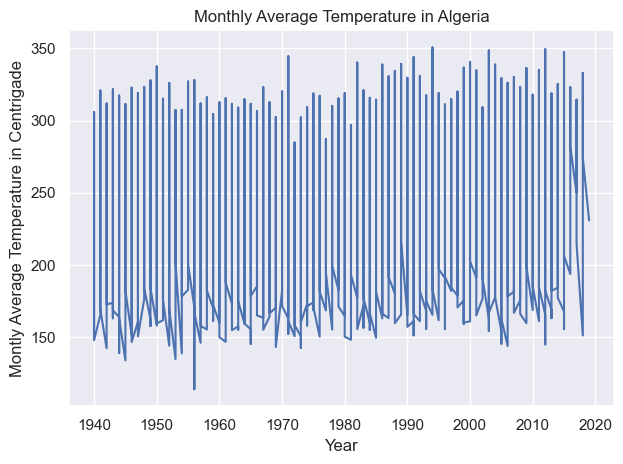

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


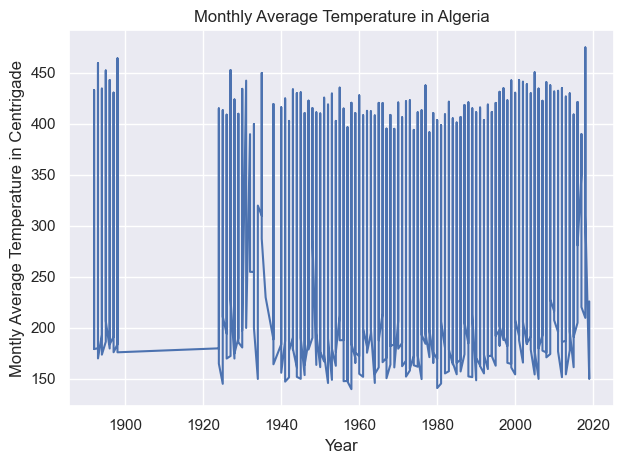

c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\rules.py:72: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kbagh\miniconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


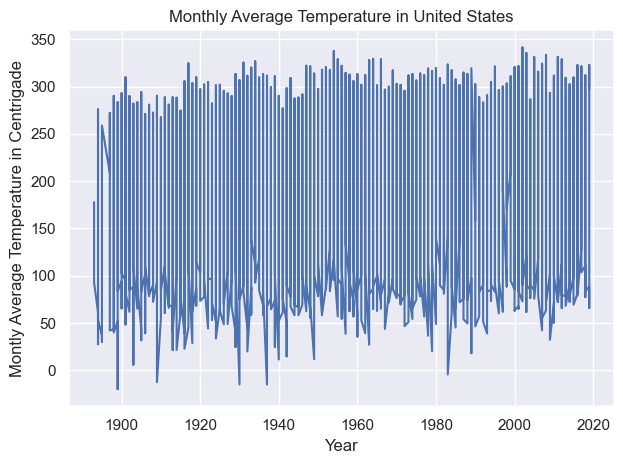

In [15]:
station1 = final_df[final_df["id"] == "AG000060390"]
station2 = final_df[final_df["id"] == "AG000060590"]
station3 = final_df[final_df["id"] == "USC00050848"]

import seaborn.objects as so

so.Plot(station1, x="year", y="avg_temp").add(so.Line()).label(
    x="Year",
    y="Montly Average Temperature in Centrigade",
    title="Monthly Average Temperature in Algeria",
).show()
so.Plot(station2, x="year", y="avg_temp").add(so.Line()).label(
    x="Year",
    y="Montly Average Temperature in Centrigade",
    title="Monthly Average Temperature in Algeria",
).show()
so.Plot(station3, x="year", y="avg_temp").add(so.Line()).label(
    x="Year",
    y="Montly Average Temperature in Centrigade",
    title="Monthly Average Temperature in United States",
).show()

## Want More Practice?

If you *really* want a challenge, the file `ghcnd_daily_30gb.tar.gz` will decompress into `ghcnd_daily.dat`, the full version of the GHCND daily data. It contains not only daily high temps, but also daily low temps, preciptionation, etc. Moreover, it is still in fixed-width format, and is about 30gb in raw form. 

Importing and chunking this data (with moderate optimizations) took about 2 hours on my computer. 

If you're up for it, it's a great dataset to wrestling with data in weird formats and chunking. 

**Pro-tip:** strings take up *way* more space in RAM than numbers, so some columns can be converted to keep the memory footprint of the data down. 